In [1]:
from mycnn import LeNet5
from mycnn import utils
import tensorflow as tf
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# reshape 784 to 28x28x1
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# pad image from 28x28x1 to 32x32x1
x_train = np.pad(x_train, ((0,0),(2,2),(2,2),(0,0)))
x_test = np.pad(x_test, ((0,0),(2,2),(2,2),(0,0)))
print(x_train.shape)
print(x_test.shape)

# convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

(60000, 32, 32, 1)
(10000, 32, 32, 1)


In [3]:
lenet5 = LeNet5(
    input_shape=(32,32,1),
    classes_num=10
)
lenet5.summary()

Model: "LeNet5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120

In [4]:
lenet5.setup_training(
    logdir='log_lenet5',
    epochs=10,
    batch_size=100,
    optimizer=tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.0, decay=0.0),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

******************************
Loading last checkpoint...
Start traing from epoch 10
******************************
checkpoint_path : log_lenet5\weights
best_checkpoint : log_lenet5\weights.h5
epochs          : 10
initial_epoch   : 10
batch_size      : 100
optimizer       : <tensorflow.python.keras.optimizer_v2.gradient_descent.SGD object at 0x0000018BF3AB24C8>
loss            : categorical_crossentropy
metrics         : ['accuracy']


In [5]:
lenet5.train(x_train[:50000], y_train[:50000], x_train[50000:], y_train[50000:])

Epoch 1/10
500/500 [==============================] - 8s 10ms/step - loss: 0.6648 - accuracy: 0.8137 - val_loss: 0.1708 - val_accuracy: 0.9532

Epoch 00001: val_loss improved from inf to 0.17080, saving model to log_lenet5\weights.h5
Epoch 2/10
500/500 [==============================] - 7s 13ms/step - loss: 0.1687 - accuracy: 0.9488 - val_loss: 0.1092 - val_accuracy: 0.9693

Epoch 00002: val_loss improved from 0.17080 to 0.10919, saving model to log_lenet5\weights.h5
Epoch 3/10
500/500 [==============================] - 4s 8ms/step - loss: 0.1070 - accuracy: 0.9689 - val_loss: 0.0840 - val_accuracy: 0.9762

Epoch 00003: val_loss improved from 0.10919 to 0.08403, saving model to log_lenet5\weights.h5
Epoch 4/10
500/500 [==============================] - 5s 9ms/step - loss: 0.0778 - accuracy: 0.9763 - val_loss: 0.0761 - val_accuracy: 0.9770

Epoch 00004: val_loss improved from 0.08403 to 0.07613, saving model to log_lenet5\weights.h5
Epoch 5/10
500/500 [==============================] - 

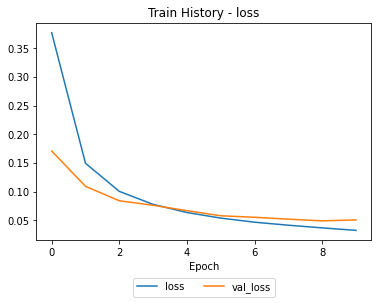

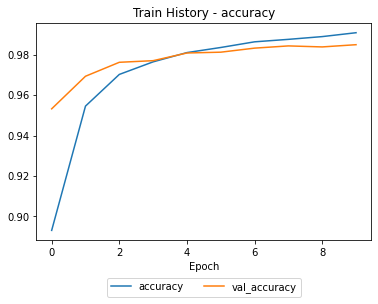

In [6]:
lenet5.show_history(["loss", "accuracy"])

In [7]:
lenet5.eval(x_test, y_test)

100/100 [==============================] - 0s 4ms/step - loss: 0.0503 - accuracy: 0.9851


[0.050301581621170044, 0.9850999712944031]

100%|██████████| 10000/10000 [00:00<00:00, 181836.09it/s]


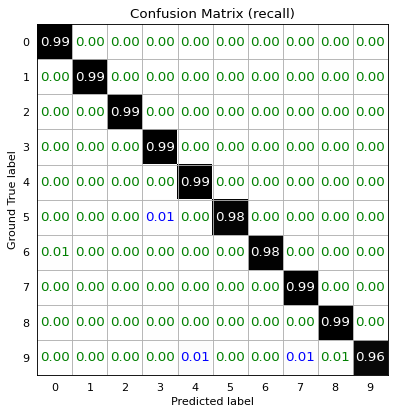

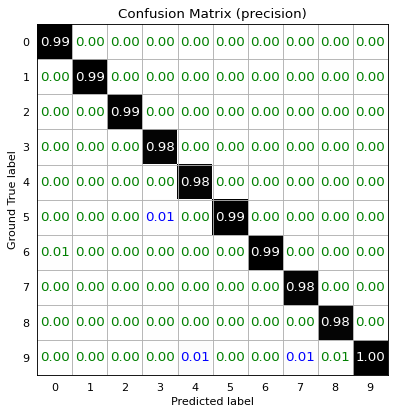

In [5]:
pr_score = lenet5.pred(x_test)
pr_label = pr_score.argmax(axis=-1)
gt_label = y_test.argmax(axis=-1)

target_names = [str(i) for i in range(10)]

report = utils.export_classification_report(
    gt_label, pr_label, pr_score,
    target_names=target_names,
    logpath=lenet5.logdir
)

cm = report["confusion_matrix"]
cm_precision = cm/cm.sum(axis=0)
cm_recall = cm/cm.sum(axis=1)
utils.plot_confusion_matrix(cm_recall, target_names, lenet5.logdir, title='Confusion Matrix (recall)')
utils.plot_confusion_matrix(cm_precision, target_names, lenet5.logdir, title='Confusion Matrix (precision)')